Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions between computers and human (natural) languages. In my first NLP post I will create a simple, yet effective sentiment analysis model that can classify a movie review on [IMDB](http://www.imdb.com/) as being either positive or negative.

# NLP: The Basics of Sentiment Analysis
If you have been reading AI related news in the last few years, you were probably reading about Reinforcement Learning. However,  next to Google's [AlphaGo](https://deepmind.com/research/alphago/) and the poker AI called [Libratus](https://www.wired.com/2017/02/libratus/) that out-bluffed some of the best human players, there have been a lot of chat bots that made it into the news. For instance, there is the [Microsoft's chatbot](https://www.theverge.com/2016/3/24/11297050/tay-microsoft-chatbot-racist) that turned racist in less than a day. And there is the chatbot that made news when it convinced 10 out 30 judges at the University of [Reading's 2014 Turing Test](http://www.reading.ac.uk/news-and-events/releases/PR583836.aspx) that it was human, thus winning the contest. NLP is the exciting field in AI that aims at enabling machines to understand and speak human language. One of the most popular commercial products is the IBM Watson. And while I am already planning a post regarding IBM's NLP tech, with this first NLP post, I will start with the some very basic NLP.

## The Data: Reviews and Labels
The data consists of 25000 IMDB reviews. Each review is stored as a single line in the file reviews.txt. The reviews have already been preprocessed a bit and contain only lower case characters. The labels.txt file contains the corresponding labels. Each review is either labeled as POSITIVE or NEGATIVE. Let's read the data and print some of it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('data/reviews.txt','r') as file_handler:
    reviews = np.array(list(map(lambda x:x[:-1], file_handler.readlines())))

with open('data/labels.txt','r') as file_handler:
    labels = np.array(list(map(lambda x:x[:-1].upper(), file_handler.readlines())))

In [3]:
unique, counts = np.unique(labels, return_counts=True)
print('Reviews', len(reviews), 'Labels', len(labels), dict(zip(unique, counts)))
for i in range(10):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

Reviews 25000 Labels 25000 {'POSITIVE': 12500, 'NEGATIVE': 12500}
POSITIVE	:	bromwell high is a cartoon comedy . it ran at the same time as some other progra...
NEGATIVE	:	story of a man who has unnatural feelings for a pig . starts out with a opening ...
POSITIVE	:	homelessness  or houselessness as george carlin stated  has been an issue for ye...
NEGATIVE	:	airport    starts as a brand new luxury    plane is loaded up with valuable pain...
POSITIVE	:	brilliant over  acting by lesley ann warren . best dramatic hobo lady i have eve...
NEGATIVE	:	this film lacked something i couldn  t put my finger on at first charisma on the...
POSITIVE	:	this is easily the most underrated film inn the brooks cannon . sure  its flawed...
NEGATIVE	:	sorry everyone    i know this is supposed to be an  art  film   but wow  they sh...
POSITIVE	:	this is not the typical mel brooks film . it was much less slapstick than most o...
NEGATIVE	:	when i was little my parents took me along to the theater to see int

The dataset is perfectly balanced across the two categories POSITIVE and NEGATIVE. 

## Counting words
Let's build up a simple sentiment theory. It is common sense that some of the words are more common in positive reviews and some are more frequently found in negative reviews. For example, I expect words like "supurb", "impresive", "magnificent", etc. to be common in positive reviews, while words like "miserable", "bad", "horrible", etc. to appear in negative reviews. Let's count the words in order to see what words are most common and what words appear most frequently the positive and the negative reviews.  

In [4]:
from collections import Counter

positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [5]:
# Examine the counts of the most common words in positive reviews
print('Most common words:', total_counts.most_common()[0:30])
print('\nMost common words in NEGATIVE reviews:', negative_counts.most_common()[0:30])
print('\nMost common words in POSITIVE reviews:', positive_counts.most_common()[0:30])

Most common words: [('', 1111930), ('the', 336713), ('.', 327192), ('and', 164107), ('a', 163009), ('of', 145864), ('to', 135720), ('is', 107328), ('br', 101872), ('it', 96352), ('in', 93968), ('i', 87623), ('this', 76000), ('that', 73245), ('s', 65361), ('was', 48208), ('as', 46933), ('for', 44343), ('with', 44125), ('movie', 44039), ('but', 42603), ('film', 40155), ('you', 34230), ('on', 34200), ('t', 34081), ('not', 30626), ('he', 30138), ('are', 29430), ('his', 29374), ('have', 27731)]

Most common words in NEGATIVE reviews: [('', 561462), ('.', 167538), ('the', 163389), ('a', 79321), ('and', 74385), ('of', 69009), ('to', 68974), ('br', 52637), ('is', 50083), ('it', 48327), ('i', 46880), ('in', 43753), ('this', 40920), ('that', 37615), ('s', 31546), ('was', 26291), ('movie', 24965), ('for', 21927), ('but', 21781), ('with', 20878), ('as', 20625), ('t', 20361), ('film', 19218), ('you', 17549), ('on', 17192), ('not', 16354), ('have', 15144), ('are', 14623), ('be', 14541), ('he', 13856

Well, at a first glance, that seems dissapointing. As expected, the most common words are some linking words like "the", "of", "for", "at", etc. Counting the words for POSITIVE and NEGATIVE reviews separetely might appear pontless at first, as the same linking words are found among the most common for both the POSITIVE and NEGATIVE reviews.

## Sentiment Ratio

However, counting the words that way would allow us to build a far more meaningful metric, called the sentiment ratio. A word with a sentiment ratio of 1 is used only in POSITIVE reviews. A word with a sentiment ratio of -1 is used only in NEGATIVE reviews. A word with sentiment ratio of 0 are neither POSITIVE nor NEGATIVE, but are neutral. Hence, linking words like the once shown above are expected to be close to the neutral 0. Let's draw the sentiment ratio for all words. I am expecting to see figure showing a beautiful normal distribution.

Total words in sentiment ratio 74074


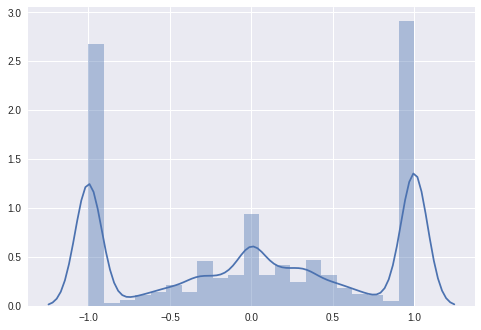

In [6]:
import seaborn as sns

sentiment_ratio = Counter()
for word, count in list(total_counts.most_common()):
    sentiment_ratio[word] = ((positive_counts[word] / total_counts[word]) - 0.5) / 0.5
print('Total words in sentiment ratio', len(sentiment_ratio))
sns.distplot(list(sentiment_ratio.values()));

Well that looks like a normal distribution with a considerable amount of words that were used only in POSITIVE and only in NEGATIVE reviews. Could it be, those are words that occur only once or twice in the review corpus? They are not necessarly useful when identifying the sentiment, as they occur only in one of few reviews. If that is the case it would be better to exclude these words. We want our models to generalize well instead of overfitting on some very rare words. Let's exclude all words that occur less than 'min_occurance' times in the whole review corpus.

Total words in sentiment ratio 4276


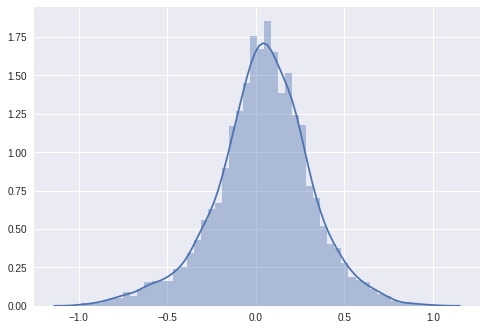

In [7]:
min_occurance = 100

sentiment_ratio = Counter()
for word, count in list(total_counts.most_common()):
    if total_counts[word] >= min_occurance: # only consider words 
        sentiment_ratio[word] = ((positive_counts[word] / total_counts[word]) - 0.5) / 0.5
print('Total words in sentiment ratio', len(sentiment_ratio))
sns.distplot(list(sentiment_ratio.values()));

And that is the beautiful normal destribution that I was expecting. The total word count shrinked from 74074 to 4276. Hence, there are many words that have been used only few times. Looking at the figure, there are a lot of neutral words in our new sentiment selection, but there are also some words that are used almost exclusively in POSITIVE or NEGATIVE reviews. You can try different values for 'min_occurance' and observe how the amount of total words and the plot is changing. Let's check out the words for min_occurance = 100.

In [8]:
print('Words with the most POSITIVE sentiment' ,sentiment_ratio.most_common()[:30])
print('\nWords with the most NEGATIVE sentiment' ,sentiment_ratio.most_common()[-30:])

Words with the most POSITIVE sentiment [('edie', 1.0), ('paulie', 0.9831932773109244), ('felix', 0.9338842975206612), ('polanski', 0.9056603773584906), ('matthau', 0.8980891719745223), ('victoria', 0.8798283261802575), ('mildred', 0.8782608695652174), ('gandhi', 0.8688524590163935), ('flawless', 0.8560000000000001), ('superbly', 0.8253968253968254), ('perfection', 0.8055555555555556), ('astaire', 0.803030303030303), ('voight', 0.7837837837837838), ('captures', 0.7777777777777777), ('wonderfully', 0.771604938271605), ('brosnan', 0.765625), ('powell', 0.7652582159624413), ('lily', 0.7575757575757576), ('bakshi', 0.7538461538461538), ('lincoln', 0.75), ('lemmon', 0.7431192660550459), ('breathtaking', 0.7380952380952381), ('refreshing', 0.7378640776699028), ('bourne', 0.736842105263158), ('flynn', 0.727891156462585), ('homer', 0.7254901960784315), ('soccer', 0.7227722772277227), ('delightful', 0.7226277372262773), ('andrews', 0.7218543046357615), ('lumet', 0.72)]

Words with the most NEGAT

There are a lot of names among the words with positive sentiment. For example, edie (probably from edie falco, who won 2 Golden Globes and another 21 wins & 70 nominations), polanski (probably from roman polanski, who won 1 oscar and another 83 wins & 75 nominations). But there are also words like "superbly", "breathtaking", "refreshing", etc. Those are exactly the positive sentiment loaded words I was looking for. Similarly, there are words like "insult", "uninspired", "lame", "sucks", "miserably", "boredom" that no director would be happy to read in the reviews regarding his movie. One name catches the eye - that is "seagal", (probably from Steven Seagal). Well, I won't comment on that.

## Naive Sentiment Classifier
Let's build a naive machine learning classifier. This classifier is very simple and does not utilize any special kind of models like linear regression, trees or neural networks. However, it is sill a machine LEARNING classifier as you need data that it fits on in order to use it for predictions. It is largely based on the sentiment radio that we previously discussed and has only two parameters 'min_word_count' and 'sentiment_threshold'. Here it is: 

In [9]:
class NaiveSentimentClassifier:
    def __init__(self, min_word_count, sentiment_threshold):
        self.min_word_count = min_word_count
        self.sentiment_threshold = sentiment_threshold

    def fit(self, reviews, labels):
        positive_counts = Counter()
        total_counts = Counter()

        for i in range(len(reviews)):
            if(labels[i] == 'POSITIVE'):
                for word in reviews[i].split(" "):
                    positive_counts[word] += 1
                    total_counts[word] += 1
            else:
                for word in reviews[i].split(" "):
                    total_counts[word] += 1
        
        self.sentiment_ratios = Counter()
        
        for word, count in total_counts.items():
            if(count > self.min_word_count):
                self.sentiment_ratios[word] = \
                ((positive_counts[word] / count) - 0.5) / 0.5
        
    def predict(self, reviews):
        predictions = []
        for review in reviews:
            sum_review_sentiment = 0
            for word in review.split(" "):
                if abs(self.sentiment_ratios[word]) >= self.sentiment_threshold:
                    sum_review_sentiment += self.sentiment_ratios[word]
            if sum_review_sentiment >= 0:
                predictions.append('POSITIVE')
            else:
                predictions.append('NEGATIVE')
        return predictions

The classifier has only two parameters - 'min_word_count' and 'sentiment_threshold'. A min_word_count of 20 means the classifier will only consider words that occur at least 20 times in the review corpus. The 'sentiment_threshhold' allows you to ignore words with rather neutral sentiment. A 'sentiment_threshhold' of 0.3 means that only words with sentiment ratio of more than 0.3 or less than -0.3 would be considered in the prediction process. What the classifier does is creating the sentiment ratio like previosly shown. When predicting the sentiment, the classifier uses the sentiment ratio dict to sum up all sentiment ratios of all the words used in the review. If the overall sum is positive the sentiment is also positive. If the overall sum is negative the sentiment is also negative. It is pretty simple, isn't it? Let's measure the performance in a 5 fold cross-validation setting:

In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

all_predictions = []
all_true_labels = []

for train_index, validation_index in KFold(n_splits=5, random_state=42, shuffle=True).split(labels):
    trainX, trainY = reviews[train_index], labels[train_index]
    validationX, validationY = reviews[validation_index], labels[validation_index]
    
    classifier = NaiveSentimentClassifier(20, 0.3)
    classifier.fit(trainX, trainY)
    
    predictions = classifier.predict(validationX)
    print('Fold accuracy', accuracy_score(validationY, predictions))
    all_predictions += predictions
    all_true_labels += list(validationY)

print('CV accuracy', accuracy_score(all_true_labels, all_predictions))

Fold accuracy 0.8576
Fold accuracy 0.8582
Fold accuracy 0.8546
Fold accuracy 0.858
Fold accuracy 0.859
CV accuracy 0.85748


A cross-validaiton accuracy of 85.7% is not bad for this naive approach and a classifier that trains in only a few seconds. At this point you will be asking yourself, can this score be easily beaten with the use of a neural network. Let's see.

## Neural Networks can do better

To train a neural network you should transform the data to a format the neural network can undestand. Hence, first you need to convert the reviews to numerical vectors. Let's assume the neural network would be only interested on the words: "breathtaking", "refreshing", "sucks" and "lame". Thus, we have an input vector of size 4. If the review does not contain any of these words the input vector would contain only zeros: [0, 0, 0, 0]. If the review is "Wow, that was such a refreshing experience. I was impreced by the breathtaking acting and the breathtaking visual effects.", the input vector would look like this: [1, 2, 0, 0]. A negative review such as "Wow, that was some lame acting and a lame music. Totally, lame. Sad." would be transformed to an input vector like this [0, 0, 0, 3]. Anyway, you need to create a word2index dictionary that points to an index of the vector for a given word:

In [11]:
def create_word2index(min_occurance, sentiment_threshold):
    
    word2index = {}
    index = 0
    
    sentiment_ratio = Counter()
    for word, count in list(total_counts.most_common()):
        sentiment_ratio[word] = ((positive_counts[word] / total_counts[word]) - 0.5) / 0.5
    
    is_word_eligable = lambda word: word not in word2index and \
                total_counts[word] >= min_occurance and \
                abs(sentiment_ratio[word]) >= sentiment_threshold
    
    for i in range(len(reviews)):
        for word in reviews[i].split(" "):
            if is_word_eligable(word):
                word2index[word] = index
                index += 1  
    
    print("Word2index contains", len(word2index), 'words.')
    return word2index

Same as before, the create_word2index has the two parameters 'min_occurance' and 'sentiment_threshhold' Check the explanation of those two in the previous section. Anyway, once you have the word2index dict, you can encode the reviews with the function below:

In [12]:
def encode_reviews_by_word_count(word2index):    
    encoded_reviews = []
    for i in range(len(reviews)):
        review_array = np.zeros(len(word2index))
        for word in reviews[i].split(" "):
            if word in word2index:
                review_array[word2index[word]] += 1
        encoded_reviews.append(review_array)
    encoded_reviews = np.array(encoded_reviews)
    print('Encoded reviews matrix shape', encoded_reviews.shape)
    return encoded_reviews

Labels are easily one-hot encoded. Check out [this explanation](http://www.cs.toronto.edu/~guerzhoy/321/lec/W04/onehot.pdf) on why one-hot encoding is needed:

In [13]:
def encode_labels():
    encoded_labels = []
    for label in labels:
        if label == 'POSITIVE':
            encoded_labels.append([0, 1])
        else:
            encoded_labels.append([1, 0])
    return np.array(encoded_labels)

At this point, you can transform both the reviews and the labels into data that the neural network can understand. Let's do that:

In [14]:
word2index = create_word2index(min_occurance=10, sentiment_threshold=0.2)
encoded_reviews = encode_reviews_by_word_count(word2index)
encoded_labels = encode_labels()

Word2index contains 11567 words.
Encoded reviews matrix shape (25000, 11567)


You are good to go and train the neural network. In the example below, I'am using a simple neural network consisting of two fully connected layers. Trying different things out, I found Dropout before the first layer can reduce overfitting. Dropout between the first and the second layer, however, made the performance worse. Increasing the the number of the hidden units in the two layers did't lead to better performance, but to more overfitting. Increasing the number of layers made no difference.

In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras import metrics

all_predictions = []
all_true_labels = []

model_index = 0

for train_index, validation_index in \
    KFold(n_splits=5, random_state=42, shuffle=True).split(encoded_labels):

    model_index +=1
    model_path= 'models/model_' + str(model_index)
    print('Training model: ', model_path)

    train_X, train_Y = encoded_reviews[train_index], encoded_labels[train_index]
    validation_X, validation_Y = encoded_reviews[validation_index], encoded_labels[validation_index]

    save_best_model = ModelCheckpoint(
        model_path,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True)
    
    model = Sequential()
    model.add(Dropout(0.3, input_shape=(len(word2index),)))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(2, activation="softmax"))
        
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=[metrics.categorical_accuracy])
    
    model.fit(train_X, train_Y, 
              validation_data=(validation_X, validation_Y),
              callbacks = [save_best_model],
              epochs=20, batch_size=32, verbose=0)
        
    model.load_weights(model_path)
        
    all_true_labels += list(validation_Y[:, 0])
    all_predictions += list(model.predict(validation_X)[:, 0] > 0.5)

print('CV accuracy', accuracy_score(all_true_labels, all_predictions))

Training model:  models/model_1
Training model:  models/model_2
Training model:  models/model_3
Training model:  models/model_4
Training model:  models/model_5
CV accuracy 0.90196


A performance of 90,2% is significant improvement towards the naive classifier that has been previously build. Without a doubt the architecture above can be tuned and a bit better performance can be reached. Nevertheless, there are points in this NLP approach that when bettered can lead to much bigger performance gains. One of most important aspects when approaching a NLP task are the data pre-processing and the feature engineering. I will dicuss many interesting techniques such as e.g. [TF-IDF](https://nlp.stanford.edu/IR-book/html/htmledition/tf-idf-weighting-1.html). Until then make sure you check out this repo and run the code on your own.